In [1]:
import pandas as pd

df = pd.read_csv('dataset.csv')

new_columns = {
    'Timestamp': 'timestamp',
    'By selecting the agree option, you are confirming the following:\n•  I have read all the information in this participant Information and Consent Form including any information regarding the risk in this study and I have had time to think about it.\n•  I voluntarily agree to be part of this research study, to follow the study procedures, and to provide necessary information to the researcher as requested.': 'consent',
    '1. What is your gender?': 'gender',
    '2. What is your course?': 'course',
    '3. What is your academic year?': 'academic_year',
    '4. What is your current CGPA?': 'cgpa',
    '5. What is your familiarity with Generative AI Tools(e.g. ChatGPT, DeepSeek, Google Gemini, Microsoft Coplilot)?': 'ai_familiarity',
    '6.  How frequently do you use generative AI tools for academic purposes (e.g., for assignments, tutorials/practical exercises, and course study/revision)?': 'ai_usage_frequency',
    '7. On a scale of 1–5 (1 = Very Low, 5 = Very High), how would you rate your overall IT skill proficiency (including programming, troubleshooting, and system design) in your academic work?': 'it_proficiency',
    '8. Select the programming language that you familiar with': 'programming_languages',
    '9. How many co-curricular activities such as workshop, competition (e.g. Hackathon) which is IT-related you had participated?': 'it_activities_count',
    '10. How many IT-related project had you completed? (Including assignment project, competition project, etc.)': 'it_projects_count',
    '11. I can independently troubleshoot technical issues and solve IT-related problems, whether or not I use generative AI tools.': 'independent_troubleshooting',
    '12. Generative AI tools (e.g., ChatGPT, GitHub Copilot) help me better understand challenging IT course concepts.': 'ai_helps_understanding',
    '13. Using generative AI has improved my efficiency in completing IT assignments and projects.': 'ai_improves_efficiency',
    '14. Generative AI tools are useful for brainstorming and developing innovative solutions during coursework.': 'ai_useful_brainstorming',
    '15. Integrating generative AI into my coursework has positively impacted my overall academic performance.': 'ai_positive_impact',
    '16. The integration of generative AI in our curriculum has significantly increased my engagement and motivation to learn IT concepts.': 'ai_increases_engagement',
    '17. I often rely on generative AI tools to solve coding or technical problems without first attempting to solve them on my own.': 'ai_over_reliance',
    '18. When I use generative AI, I sometimes bypass understanding the underlying logic behind the solution.': 'ai_bypass_understanding',
    '19. I feel less confident in my ability to write code independently due to my frequent use of generative AI tools.': 'ai_reduces_confidence',
    '20. I have experienced a decline in my debugging and troubleshooting skills as a result of relying on generative AI tools.': 'ai_reduces_debugging_skills',
    '21. Frequent use of generative AI has reduced my motivation to practice and improve my core IT skills manually.': 'ai_reduces_motivation'
}

df = df.rename(columns=new_columns)

df.to_csv('renamed_dataset.csv', index=False)

print("Updated column names:")
print(df.columns.tolist())

Updated column names:
['timestamp', 'consent', 'gender', 'course', 'academic_year', 'cgpa', 'ai_familiarity', 'ai_usage_frequency', 'it_proficiency', 'programming_languages', 'it_activities_count', 'it_projects_count', 'independent_troubleshooting', 'ai_helps_understanding', 'ai_improves_efficiency', 'ai_useful_brainstorming', 'ai_positive_impact', 'ai_increases_engagement', 'ai_over_reliance', 'ai_bypass_understanding', 'ai_reduces_confidence', 'ai_reduces_debugging_skills', 'ai_reduces_motivation']


In [2]:
df = df.drop(['timestamp','consent'],axis=1)

In [3]:
df.columns

Index(['gender', 'course', 'academic_year', 'cgpa', 'ai_familiarity',
       'ai_usage_frequency', 'it_proficiency', 'programming_languages',
       'it_activities_count', 'it_projects_count',
       'independent_troubleshooting', 'ai_helps_understanding',
       'ai_improves_efficiency', 'ai_useful_brainstorming',
       'ai_positive_impact', 'ai_increases_engagement', 'ai_over_reliance',
       'ai_bypass_understanding', 'ai_reduces_confidence',
       'ai_reduces_debugging_skills', 'ai_reduces_motivation'],
      dtype='object')

In [4]:
df.shape

(151, 21)

In [5]:
df[df.isna()].count()

gender                         0
course                         0
academic_year                  0
cgpa                           0
ai_familiarity                 0
ai_usage_frequency             0
it_proficiency                 0
programming_languages          0
it_activities_count            0
it_projects_count              0
independent_troubleshooting    0
ai_helps_understanding         0
ai_improves_efficiency         0
ai_useful_brainstorming        0
ai_positive_impact             0
ai_increases_engagement        0
ai_over_reliance               0
ai_bypass_understanding        0
ai_reduces_confidence          0
ai_reduces_debugging_skills    0
ai_reduces_motivation          0
dtype: int64

In [6]:
df = df.drop_duplicates()
df.shape

(151, 21)

In [7]:
def clean_academic_year(x):
    if x == 'Year 1':
        return 1
    elif x == 'Year 2':
        return 2
    elif x == 'Year 3':
        return 3
    elif x == 'Year 4':
        return 4
    
def clean_CGPA(x):
    if x == 'CGPA ≥ 3.8':
        return 6
    elif x == '3.5 ≤ CGPA < 3.8':
        return 5
    elif x == '3.0 ≤ CGPA < 3.5':
        return 4
    elif x == '2.5 ≤ CGPA < 3.0':
        return 3
    elif x == '2.0 ≤ CGPA < 2.5':
        return 2
    elif x == 'CGPA < 2.0':
        return 1

def no_of_programming_lang(x):
    return len(x.split(';'))

gender_mapping = {
    "Male": 1,
    "Female": 0
}

course_mapping = {
    "Foundation in Computing": 0,
    "Diploma in Computer Science": 1,
    "Diploma in Information Technology": 1,
    "Bachelor of Science (Honours) in Management Mathematics with Computing": 2,
    "Bachelor of Information Systems (Honours) in Enterprise Information Systems": 2,
    "Bachelor of Computer Science (Honours) in Interactive Software Technology": 2,
    "Bachelor of Information Technology (Honours) in Information Security": 2,
    "Bachelor in Data Science (Honours)": 2,
    "Bachelor of Information Technology (Honours) in Software Systems Development": 2,
    "Bachelor of Software Engineering (Honours)": 2,
    "Doctor of Philosophy in Computer Science": 4,
    "Doctor of Philosophy (Information Technology)": 4,
    "Doctor of Philosophy (Mathematical Sciences)": 4,
    "Master of Computer Science": 3,
    "Master of Information Technology": 3,
    "Master of Science in Mathematical Sciences": 3,
    "Master in Digital Transformation": 3
}


df['cgpa'] = df['cgpa'].apply(clean_CGPA)
df['course'] = df['course'].map(course_mapping)
df['gender'] = df['gender'].map(gender_mapping)
df['academic_year'] = df['academic_year'].apply(clean_academic_year)
df['programming_languages'] = df['programming_languages'].apply(no_of_programming_lang)

In [8]:
df

,gender,course,academic_year,cgpa,ai_familiarity,ai_usage_frequency,it_proficiency,programming_languages,it_activities_count,it_projects_count,...,ai_helps_understanding,ai_improves_efficiency,ai_useful_brainstorming,ai_positive_impact,ai_increases_engagement,ai_over_reliance,ai_bypass_understanding,ai_reduces_confidence,ai_reduces_debugging_skills,ai_reduces_motivation
0,1,2,2,6,5,5,4,8,0,8,...,3,3,3,3,3,3,3,3,3,3
1,0,2,2,6,5,5,5,5,1,11,...,5,5,5,5,5,2,3,4,3,2
2,0,2,2,6,4,4,4,6,2,11,...,4,4,4,4,4,4,4,3,3,3
3,1,2,2,5,4,4,3,3,0,7,...,4,4,4,4,4,4,2,3,3,3
4,1,2,2,5,4,5,2,4,0,8,...,4,5,5,5,5,5,5,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,1,2,2,5,5,4,4,6,1,13,...,4,4,4,4,4,4,4,4,4,4
147,1,2,3,5,4,4,4,6,4,12,...,5,5,5,5,5,5,5,5,5,5
148,1,2,2,6,5,5,5,6,1,13,...,5,5,5,5,5,5,5,5,5,5
149,1,2,3,6,5,5,5,6,2,17,...,5,4,4,4,4,4,4,4,4,4


In [9]:
df.to_csv('cleaned_dataset.csv',index=False)

In [17]:
import pingouin as pg

overall_df = df
demographic_df = df[['gender', 'course', 'academic_year','ai_familiarity','ai_usage_frequency']]
hypothesis1_df = df[['cgpa','it_proficiency', 'programming_languages', 'it_activities_count', 'it_projects_count', 'independent_troubleshooting']]
hypothesis2_df = df[['ai_helps_understanding', 'ai_improves_efficiency', 'ai_useful_brainstorming', 'ai_positive_impact', 'ai_increases_engagement',]]
hypothesis3_df = df[['ai_over_reliance', 'ai_bypass_understanding', 'ai_reduces_confidence', 'ai_reduces_debugging_skills', 'ai_reduces_motivation']]

dfs = [overall_df,demographic_df,hypothesis1_df,hypothesis2_df,hypothesis3_df]
df_names = ["Overall", "Demography", "Hypo 1", "Hypo 2", "Hypo 3"]

print("Cronbach's Alphas:")
for i, x in enumerate(dfs):
    alpha, ci = pg.cronbach_alpha(x)
    print(f"\t{df_names[i]}")
    print(f"\tCronbach Alpha: {alpha:.3f}")
    print(f"\t95% CI: [{ci[0]:.3f}, {ci[1]:.3f}]")
    print()

Cronbach's Alphas:
	Overall
	Cronbach Alpha: 0.709
	95% CI: [0.637, 0.772]

	Demography
	Cronbach Alpha: 0.554
	95% CI: [0.431, 0.657]

	Hypo 1
	Cronbach Alpha: 0.362
	95% CI: [0.191, 0.508]

	Hypo 2
	Cronbach Alpha: 0.932
	95% CI: [0.914, 0.948]

	Hypo 3
	Cronbach Alpha: 0.944
	95% CI: [0.929, 0.957]



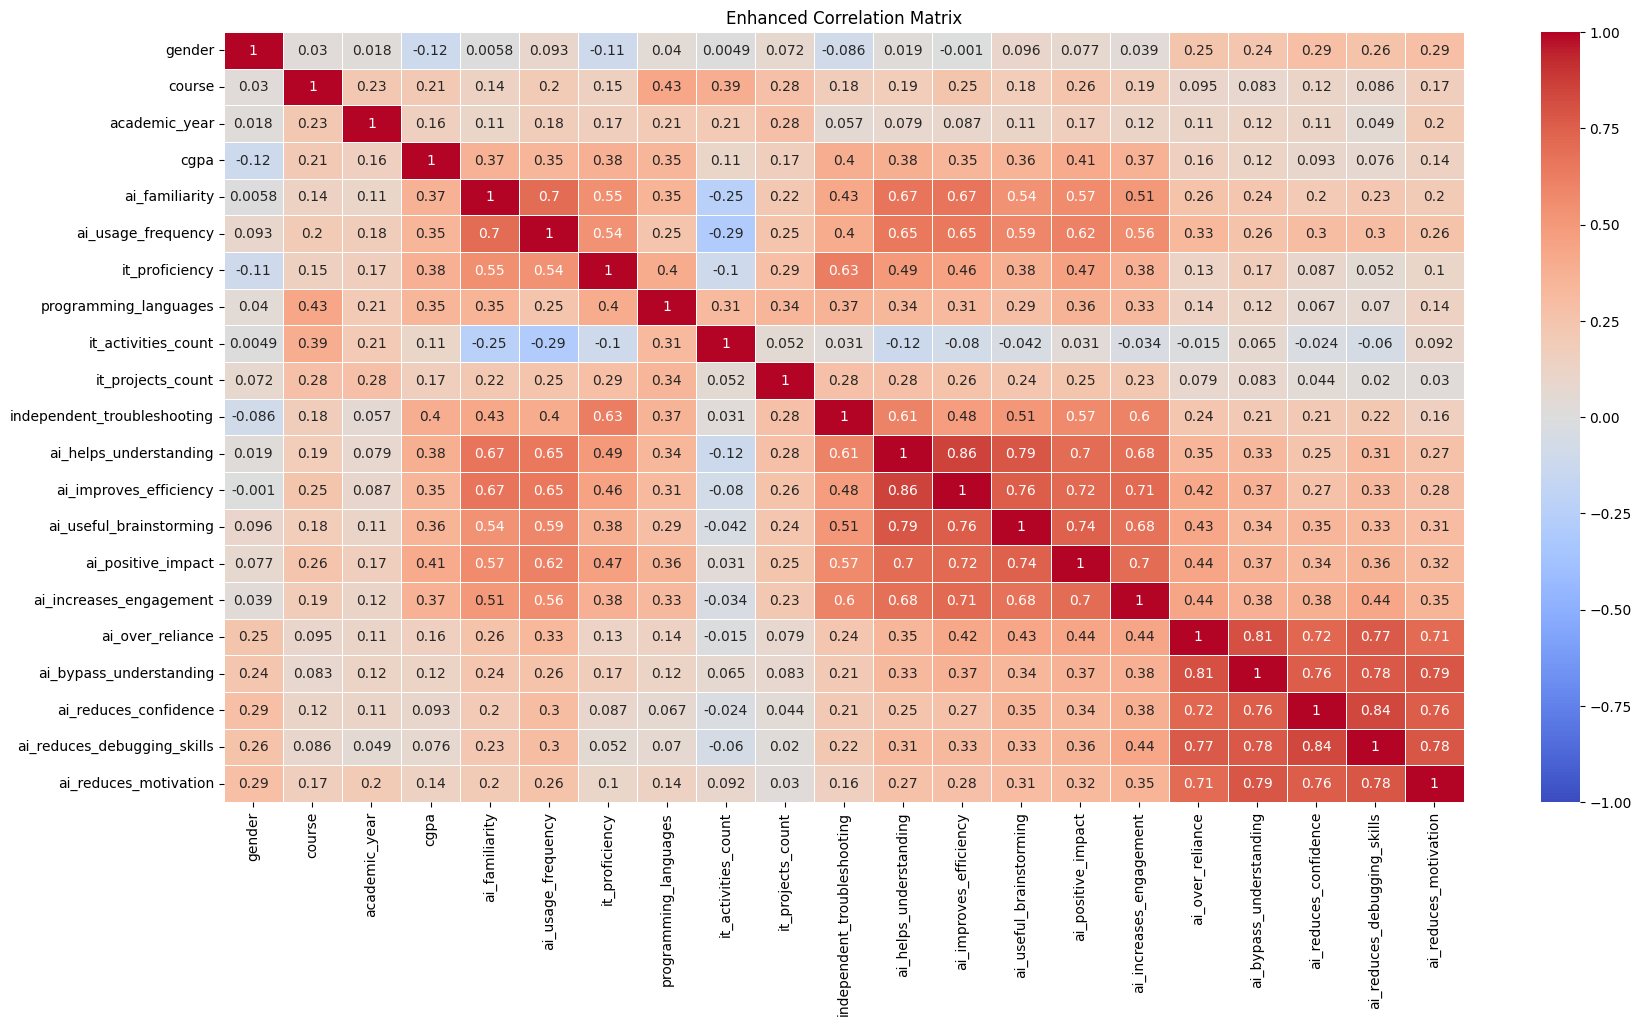

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), 
            annot=True, 
            cmap='coolwarm', 
            vmin=-1, vmax=1, 
            linewidths=.5)
plt.title('Enhanced Correlation Matrix')
plt.show()

In [23]:
#One sample t-test for it-proficiency
from IPython.display import display

it_proficiency = df['it_proficiency']
h0_mean = 3

result = pg.ttest(it_proficiency, h0_mean, alternative='greater') 
display(result)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,11.555919,150,greater,8.577166e-23,"[3.84, inf]",0.940407,5.044e+19,1.0


The p-value is lesser than 0.05, the h0 is rejected and h1 is accepted. Indicating TARUMT FOCS student has acquired at least moderate it proficiency skill in this generative AI era.